In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

germancreditdf = pd.read_csv('german_credit.csv')
germancreditdf.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
# data dimensions
print(germancreditdf.info())
print(germancreditdf.describe().transpose())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [15]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [5]:
# Print Shape of model data
germancreditdf.shape

(1000, 21)

In [107]:
newdf = pd.get_dummies(germancreditdf)
newdf.head(4)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1


In [108]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

### Check for highly correlated variables but don't required any treatment for this use case

In [109]:
# from scipy.stats import zscore

# newdf = newdf.apply(zscore)
# zscore-ing the target variable making it non-continous and create more possible classes
# hences breaks in a model.fit() function as it states that the values are not continous

newdf.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


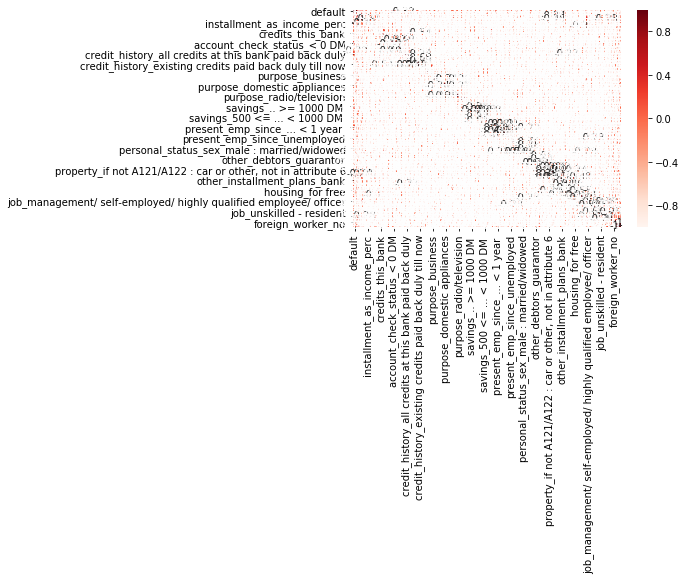

In [8]:
sns.heatmap(newdf.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()
# high val = 0.6 of corr

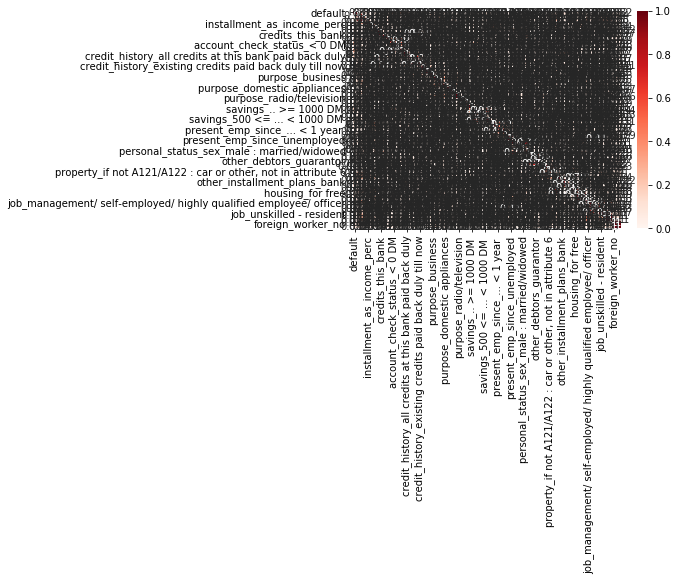

In [70]:
# take only the absolute value of corr
# we got 62 dummies 
# let run correlation matrix 
# 1. Run corr matrix
# 2. choose those features which are highly correlate with target 'default'
# 3. amongst those features choose those which are un-correlated amongst each other
# for the sake of this logic we will consider 0.5 is threshold
corr = newdf.corr().abs()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()
# print(corr_matrix)

In [117]:
corr_target = corr['default']
relevant_features = corr_target[corr_target>0.2]

print('Relevant features high correlation with target ')
print(relevant_features)

## we will not use this for now

Relevant features high correlation with target 
duration_in_month                           0.214927
account_check_status_< 0 DM                 0.258333
account_check_status_no checking account    0.322436
Name: default, dtype: float64


In [114]:
# find features which are highly correlated features amongst each other
corr.unstack().sort_values().drop_duplicates()
# assign self ones to 1
corr[corr == 1] = 0
colstodrop = [column for column in corr.columns if any(upper[column] > 0.7)]
print(colstodrop)

['personal_status_sex_male : single', 'other_debtors_none', 'other_installment_plans_none', 'housing_for free', 'housing_rent']


In [149]:
# for now only considereing correlation amongst features instead of with target
newdf1 = newdf.drop(newdf[colstodrop],axis=1)
newdf1.head(5)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,other_installment_plans_stores,housing_own,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,0,1,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,0,1,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


### Drop the original variables which are converted to dummy

In [ ]:
# this is already done.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [150]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score 

#Creating the X and y variables
X = newdf1.drop(['default'], axis=1)
y = newdf1['default'].copy()
y.columns = ['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=34)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [151]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=2, n_estimators = 500, criterion='entropy',random_state=9999)
# model.fit(train_set, train_labels)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [189]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
predicted = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
# print(y_pred)
# print(y_test)
print('Accuracy = ', acc)
print('Classification Report ')
print(classification_report(y_test, predicted))

confusionmatrix = pd.DataFrame(confusion_matrix(y_test, predicted).T, index=['No','Yes'], columns=['No','Yes'])
confusionmatrix.index.name = 'Predicted'
confusionmatrix.columns.name = 'Actual'
confusionmatrix

Accuracy =  0.7333333333333333
Classification Report 
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       204
           1       0.64      0.39      0.48        96

    accuracy                           0.73       300
   macro avg       0.70      0.64      0.65       300
weighted avg       0.72      0.73      0.71       300



Actual,No,Yes
Predicted,,
No,183,59
Yes,21,37


### Q6 Show the list of the features importance( 1 Marks)

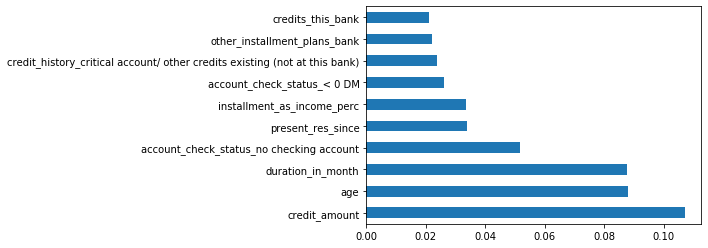

In [175]:
# get the feature importances, create a series with index from X
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# plot to visualize
feature_importances.nlargest(10).plot(kind='barh')

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [178]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [183]:
# Use below values
num_folds = 10
seed = 77

In [ ]:
#Validate the Random Forest model build above using k fold

In [186]:
kfold = KFold(n_splits=num_folds, random_state=seed)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print('results')
print(cv_results)

results
[0.87 0.69 0.77 0.82 0.78 0.67 0.77 0.79 0.76 0.76]


In [ ]:
#Calculate Mean score

In [188]:
print('mean ', cv_results.mean())

mean  0.768


In [ ]:
# Calculate score standard deviation using std()

In [187]:
print('mean ', cv_results.std())

mean  0.05436910887627274


In [190]:
print('As can be seen the model run gives us a accuracy of ', acc)
print(' whereas KVFold CV process states mean = ', cv_results.mean(), 'and std =', cv_results.std())
print('Which validates the model')

As can be seen the model run gives us a accuracy of  0.7333333333333333
 whereas KVFold CV process states mean =  0.768 and std = 0.05436910887627274
Which validates the model


# Q8 Print the confusion matrix( 1 Marks)

In [192]:
confusionmatrix = pd.DataFrame(confusion_matrix(y_test, predicted).T, index=['No','Yes'], columns=['No','Yes'])
confusionmatrix.index.name = 'Predicted'
confusionmatrix.columns.name = 'Actual'
confusionmatrix

Actual,No,Yes
Predicted,,
No,183,59
Yes,21,37


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [193]:
print('Classification Report ')
print(classification_report(y_test, predicted))

Classification Report 
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       204
           1       0.64      0.39      0.48        96

    accuracy                           0.73       300
   macro avg       0.70      0.64      0.65       300
weighted avg       0.72      0.73      0.71       300



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [194]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [196]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    model.fit(X_, y_)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [197]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7273333333333333
Standard deviation:  0.01617954813268214
